In [1]:
from numpy import array, linspace
from numpy.linalg import norm
from common import Vandermonde
from gauss import GaussElim

N = 6
v = array([1 + 0.2 *n for n in range(N)])
b = array([n % 2 for n in range(N)])
V = Vandermonde(v)
x = GaussElim(V,b)
error = V @ x - b
print(f'solution: {x}')
print(f'error from exact solution: {norm(error)}')
print(f'erroc vector {error}')

solution: [ -2751.           9709.33333335 -13500.00000002   9250.00000002
  -3125.00000001    416.66666667]
error from exact solution: 4.04003177723424e-11
erroc vector [-9.49285095e-12 -1.22781785e-11 -1.72803993e-11 -1.36424205e-11
 -1.27329258e-11 -2.72848411e-11]


n = 10
	residual norm: 6.571620063296744e-14
	error norm   : 0.0014551076269294645
n = 100
	residual norm: 4.993951777276832e-11
	error norm   : 5.673108329268347e-06
n = 1000
	residual norm: 4.303949631983078e-08
	error norm   : 1.834504170672383e-08


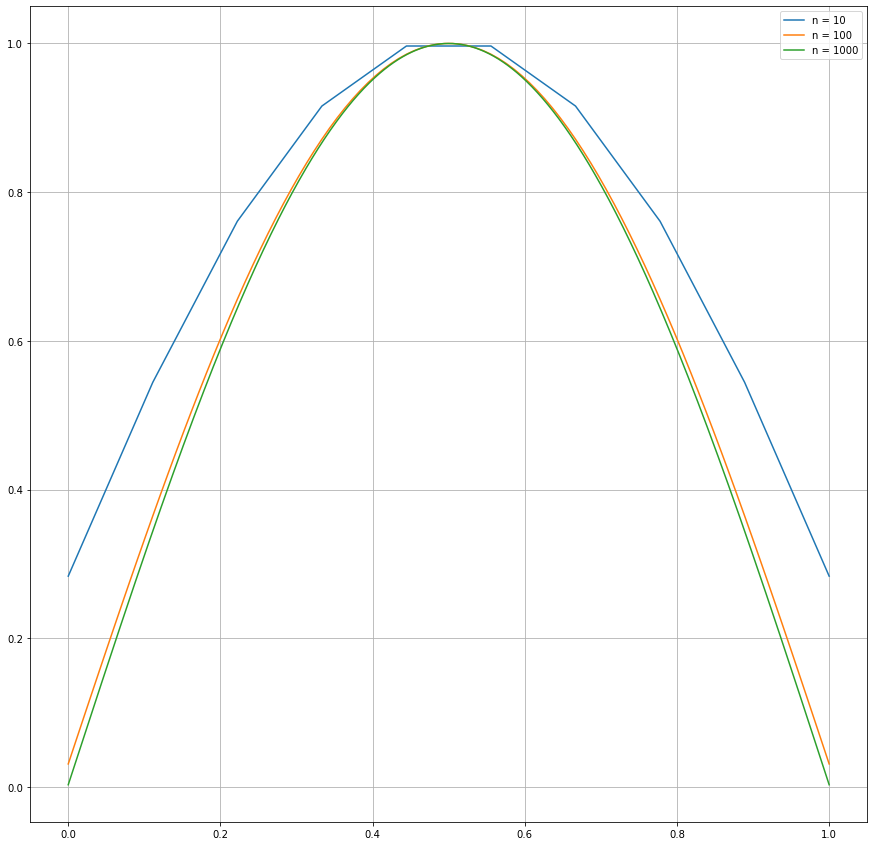

In [2]:
import matplotlib.pyplot as plt
from common import toeplitz_eigvec, An
from numpy import pi as PI, column_stack, savetxt

n_vals = [10,100,1000]
fig,ax = plt.subplots()

for n in n_vals:
    b = PI**2 * toeplitz_eigvec(n,1)
    A = An(n)
    x =GaussElim(A,b)
    axis = linspace(0,1,n)
    ax.plot(axis, x, label=f'n = {n}')
    residual = norm(b - A @ x)
    e_norm = 1.0/(n+1) * norm(x - toeplitz_eigvec(n,1))
    data = column_stack((axis, x))
    savetxt(f'4_2_2_{n}.csv', data, header='n,x', comments='', delimiter=',')
    print(f'n = {n}')
    print(f'\tresidual norm: {residual}')
    print(f'\terror norm   : {e_norm}')
    
ax.legend()
ax.grid()
fig.set_size_inches(15,15)
plt.show()